# **Importing Packages**

Make sure to install the packages before importing if needed.

In [2]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd

import igraph
import leidenalg

# **Loading Data**

To see requirements for all AnnData objects (CELLxCELL): https://github.com/chanzuckerberg/single-cell-curation/blob/main/schema/7.0.0/schema.md.

In [ ]:
## Emplacement pour elodie 
adata = sc.read_h5ad("/Users/elodiehusson/Desktop/AD & PD/77k_AD_PD_CTRL.h5ad")
## Path Yara 
# adata = sc.read_h5ad("C:/Users/yarad/Desktop/x/Masters/Master BMC - Sorbonne/M2/Single Cell/Project/Coding Project/77k_AD_PD_CTRL.h5ad")

# ajoutez vos emplacements ici du fichier, et juste mettez en commentaires les autres
# adata = sc.read_h5ad(".../.../subset_AD_PD_CTRL.h5ad")

adata_raw = adata.copy()


In [4]:
adata.var_keys

<bound method AnnData.var_keys of AnnData object with n_obs × n_vars = 77052 × 34176
    obs: 'Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'is_primary_data', 'AD_status', 'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status', 'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder', 'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry', 'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'gene_name', 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'batch_condition', 'citation', 'class_colors', 'genome', 'organism', 'organism_ontology_t

The studied conditions are the following:

In [5]:
x = adata.obs.groupby(["disease", "AD_status", "Parkinson_disease"]).size()

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_16284/385958126.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  x = adata.obs.groupby(["disease", "AD_status", "Parkinson_disease"]).size()


## **Reduced Dataset's Metadata**

scanpy shows a structured summary:

In [6]:
adata

AnnData object with n_obs × n_vars = 77052 × 34176
    obs: 'Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype', 'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'development_stage_ontology_term_id', 'sex_ontology_term_id', 'donor_id', 'suspension_type', 'is_primary_data', 'AD_status', 'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status', 'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder', 'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry', 'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'gene_name', 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'batch_condition', 'citation', 'class_colors', 'genome', 'organism', 'organism_ontology_term_id', 'schema_reference', 'sche

In [7]:
# This is the sparse matrix
print("adata.X type is :",type(adata.X))

print(adata.X[:5, :5])

adata.X type is : <class 'scipy.sparse._csr.csr_matrix'>
<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 3 stored elements and shape (5, 5)>
  Coords	Values
  (0, 2)	1.0
  (4, 2)	3.0
  (4, 4)	1.0


In [8]:
print(f"The variable adata has the following shape: {adata.shape}.")
print(f"There are {adata.shape[0]} cells and {adata.shape[1]} genes in this dataset.")

The variable adata has the following shape: (77052, 34176).
There are 77052 cells and 34176 genes in this dataset.


In [9]:
donors_per_disease = pd.crosstab(adata.obs["donor_id"],adata.obs["disease"])
donors_per_disease_summary = donors_per_disease.sum()

print("Number of donors per disease status:")
print(donors_per_disease_summary)

Number of donors per disease status:
disease
dementia || Alzheimer disease    31949
dementia || Parkinson disease     7772
normal                           37331
dtype: int64


In [10]:
print("The keys of adata.obs are the following:", adata.obs.keys())

adata.obs.head()

The keys of adata.obs are the following: Index(['Source', 'n_genes', 'n_counts', 'class', 'subclass', 'subtype',
       'tissue_ontology_term_id', 'tissue_type', 'assay_ontology_term_id',
       'cell_type_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id',
       'development_stage_ontology_term_id', 'sex_ontology_term_id',
       'donor_id', 'suspension_type', 'is_primary_data', 'AD_status',
       'DLBD_status', 'FTD_status', 'Tauopathy_status', 'Vascular_status',
       'ASCVD_status', 'Schizophrenia', 'Bipolar_Disorder',
       'Parkinson_disease', 'Tardive_dyskinesia', 'genetic_ancestry',
       'disease_ontology_term_id', 'cell_type', 'assay', 'disease', 'sex',
       'tissue', 'self_reported_ethnicity', 'development_stage',
       'observation_joinid'],
      dtype='object')


Source  n_genes  n_counts  class subclass  \
barcodekey                                                                  
Donor_333-1-GTCTGTCGTTCTCCTG-1       R     3117    6236.0  Oligo    Oligo   
Donor_1001-1-ACTTTGTGTTACCGTA-1      R     1026    1444.0  Astro    Astro   
Donor_638-1-ACCCTTGTCCTTTAGT-0       R     3025    6086.0   Endo     Endo   
Donor_865-1-TGTGAGTAGAAAGTCT-0       R     3142    6582.0  Astro    Astro   
Donor_865-1-AGATGCTAGTCTTCCC-0       R     6149   27425.0     IN   IN_SST   

                                      subtype tissue_ontology_term_id  \
barcodekey                                                              
Donor_333-1-GTCTGTCGTTCTCCTG-1   Oligo_OPALIN          UBERON:0009834   
Donor_1001-1-ACTTTGTGTTACCGTA-1    Astro_WIF1          UBERON:0009834   
Donor_638-1-ACCCTTGTCCTTTAGT-0     Endo_IL1R1          UBERON:0009834   
Donor_865-1-TGTGAGTAGAAAGTCT-0   Astro_PLSCR1          UBERON:0009834   
Donor_865-1-AGATGCTAGTCTTCCC-0   IN_SST_EDNRA          UBERON:0009834   

                                tissue_type assay_ontology_term_id  \
barcodekey                                                           
Donor_333-1-GTCTGTCGTTCTCCTG-1       tissue            EFO:0009922   
Donor_1001-1-ACTTTGTGTTACCGTA-1      tissue            EFO:0009922   
Donor_638-1-ACCCTTGTCCTTTAGT-0       tissue            EFO:0009922   
Donor_865-1-TGTGAGTAGAAAGTCT-0       tissue            EFO:0009922   
Donor_865-1-AGATGCTAGTCTTCCC-0       tissue            EFO:0009922   

                                cell_type_ontology_term_id  ...  \
barcodekey                                                  ...   
Donor_333-1-GTCTGTCGTTCTCCTG-1                  CL:0000128  ...   
Donor_1001-1-ACTTTGTGTTACCGTA-1                 CL:0000127  ...   
Donor_638-1-ACCCTTGTCCTTTAGT-0                  CL:0000115  ...   
Donor_865-1-TGTGAGTAGAAAGTCT-0                  CL:0000127  ...   
Donor_865-1-AGATGCTAGTCTTCCC-0                  CL:4023017  ...   

                                genetic_ancestry  \
barcodekey                                         
Donor_333-1-GTCTGTCGTTCTCCTG-1        East Asian   
Donor_1001-1-ACTTTGTGTTACCGTA-1            Asian   
Donor_638-1-ACCCTTGTCCTTTAGT-0        East Asian   
Donor_865-1-TGTGAGTAGAAAGTCT-0        East Asian   
Donor_865-1-AGATGCTAGTCTTCCC-0        East Asian   

                                       disease_ontology_term_id  \
barcodekey                                                        
Donor_333-1-GTCTGTCGTTCTCCTG-1   MONDO:0001627 || MONDO:0004975   
Donor_1001-1-ACTTTGTGTTACCGTA-1  MONDO:0001627 || MONDO:0004975   
Donor_638-1-ACCCTTGTCCTTTAGT-0   MONDO:0001627 || MONDO:0004975   
Donor_865-1-TGTGAGTAGAAAGTCT-0   MONDO:0001627 || MONDO:0004975   
Donor_865-1-AGATGCTAGTCTTCCC-0   MONDO:0001627 || MONDO:0004975   

                                                          cell_type  \
barcodekey                                                            
Donor_333-1-GTCTGTCGTTCTCCTG-1                      oligodendrocyte   
Donor_1001-1-ACTTTGTGTTACCGTA-1                           astrocyte   
Donor_638-1-ACCCTTGTCCTTTAGT-0                     endothelial cell   
Donor_865-1-TGTGAGTAGAAAGTCT-0                            astrocyte   
Donor_865-1-AGATGCTAGTCTTCCC-0   sst GABAergic cortical interneuron   

                                     assay                        disease  \
barcodekey                                                                  
Donor_333-1-GTCTGTCGTTCTCCTG-1   10x 3' v3  dementia || Alzheimer disease   
Donor_1001-1-ACTTTGTGTTACCGTA-1  10x 3' v3  dementia || Alzheimer disease   
Donor_638-1-ACCCTTGTCCTTTAGT-0   10x 3' v3  dementia || Alzheimer disease   
Donor_865-1-TGTGAGTAGAAAGTCT-0   10x 3' v3  dementia || Alzheimer disease   
Donor_865-1-AGATGCTAGTCTTCCC-0   10x 3' v3  dementia || Alzheimer disease   

                                    sex                          tissue  \
barcodekey                                                             

In [11]:
print("Donor Names : \n", adata.obs_names)

print("Gene Names : \n", adata.var_names) # These are Ensembl IDs

Donor Names : 
 Index(['Donor_333-1-GTCTGTCGTTCTCCTG-1', 'Donor_1001-1-ACTTTGTGTTACCGTA-1',
       'Donor_638-1-ACCCTTGTCCTTTAGT-0', 'Donor_865-1-TGTGAGTAGAAAGTCT-0',
       'Donor_865-1-AGATGCTAGTCTTCCC-0', 'Donor_1007-1-GCCCAGATCAAAGACA-0',
       'Donor_865-2-GTAGAAAAGAATTGTG-1', 'Donor_1001-1-TTGTTCACACGCACCA-1',
       'Donor_638-2-CTTTCGGAGAAACTAC-1', 'Donor_31-1-GGGACTCAGGTAGTAT-0',
       ...
       'Donor_721-1-TTGGGCGAGATGACCG-0', 'Donor_634-2-CAGATCATCACTCCGT-0',
       'Donor_735-2-AGATGCTCAAGTGACG-1', 'Donor_1278-1-GACCAATTCTCGTCAC-0',
       'Donor_634-2-TACCTGCCAGAGTAAT-0', 'Donor_735-1-CCTCTCCAGCAACCAG-0',
       'Donor_1278-1-CATTCCGCAGCTGTCG-0', 'Donor_721-2-CACTTCGGTAGTCTGT-1',
       'Donor_634-2-ACGATCATCATGAAAG-0', 'Donor_721-1-AAGCGAGCAGCGTACC-0'],
      dtype='object', name='barcodekey', length=77052)
Gene Names : 
 Index(['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419',
       'ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000000

In [12]:
disease_list = list(adata.obs["disease"].cat.categories)

print("The types of disease in this dataset are :", disease_list)

The types of disease in this dataset are : ['dementia || Alzheimer disease', 'dementia || Parkinson disease', 'normal']


The number of cells per disease type in this dataset:

In [13]:
for disease_type in disease_list : 

    print(len(adata.obs["disease"][adata.obs["disease"] == disease_type]), " cells :", disease_type)

31949  cells : dementia || Alzheimer disease
7772  cells : dementia || Parkinson disease
37331  cells : normal


Gene metadata:

In [14]:
print("adata.var.keys :", adata.var.keys())

print("First 5 rows from adata.var:")
print(adata.var.head(5))

adata.var.keys : Index(['gene_name', 'n_cells', 'feature_is_filtered', 'feature_name',
       'feature_reference', 'feature_biotype', 'feature_length',
       'feature_type'],
      dtype='object')
First 5 rows from adata.var:
                gene_name  n_cells  feature_is_filtered feature_name  \
ENSG00000000003    TSPAN6   256237                False       TSPAN6   
ENSG00000000005      TNMD    21369                False         TNMD   
ENSG00000000419      DPM1  3001206                False         DPM1   
ENSG00000000457     SCYL3  1941205                False        SCYL3   
ENSG00000000460  C1orf112  1798664                False        FIRRM   

                feature_reference feature_biotype feature_length  \
ENSG00000000003    NCBITaxon:9606            gene           2396   
ENSG00000000005    NCBITaxon:9606            gene            873   
ENSG00000000419    NCBITaxon:9606            gene           1262   
ENSG00000000457    NCBITaxon:9606            gene           2916   


#### **Existing Embeddings**
It would be interesting and informative to compare existing embeddings to our results.

In [15]:
# Embeddings (UMAP, PCA...)
print("adata.obsm.keys :", adata.obsm.keys())

# Other information
print("adata.uns.keys :", adata.uns.keys())

adata.obsm.keys : KeysView(AxisArrays with keys: X_umap)
adata.uns.keys : dict_keys(['batch_condition', 'citation', 'class_colors', 'genome', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'subclass_colors', 'subtype_colors', 'title', 'uid'])


Based on the existing UMAPs, there does not seem to be a batch effect in our data. Remove the # to view the corresponding UMAP:

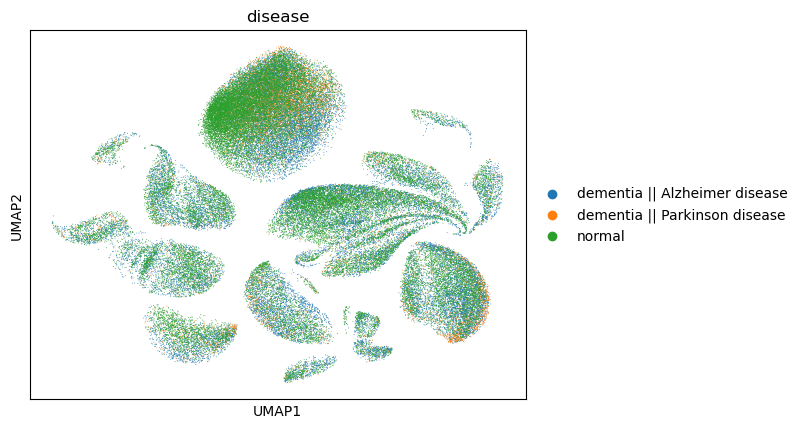

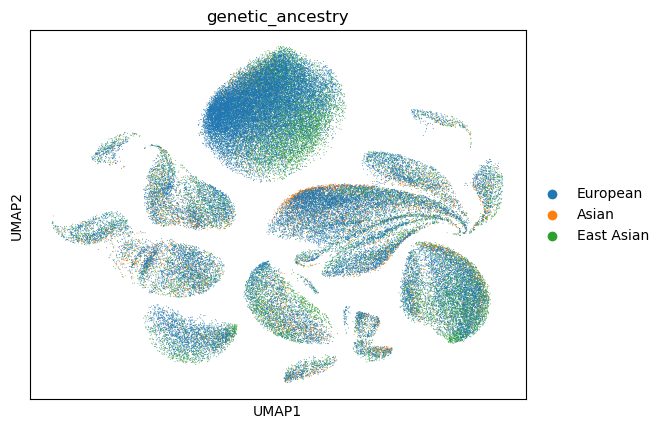

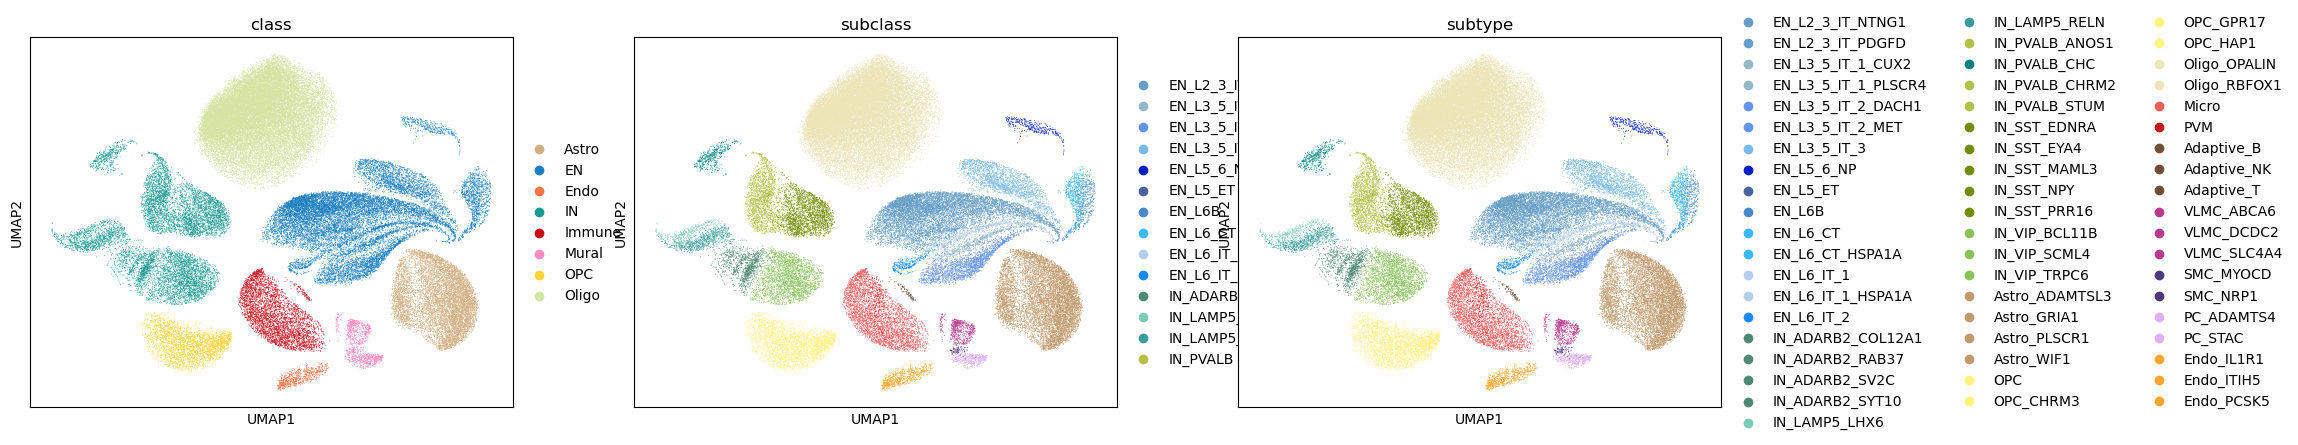

In [16]:
# sc.pl.umap(adata, color = 'cell_type')
sc.pl.umap(adata, color = 'disease')
sc.pl.umap(adata, color = 'genetic_ancestry')

# sc.pl.umap(adata, color = 'AD_status')
# sc.pl.umap(adata, color = 'sex')
# sc.pl.umap(adata, color = 'subclass')
# sc.pl.umap(adata, color = ['cell_type', 'subclass'])
sc.pl.umap(adata, color = ['class', 'subclass', 'subtype'])

# **RNAseq pipeline**

## 1. Quality Check

### a - Visualization of QC metrics

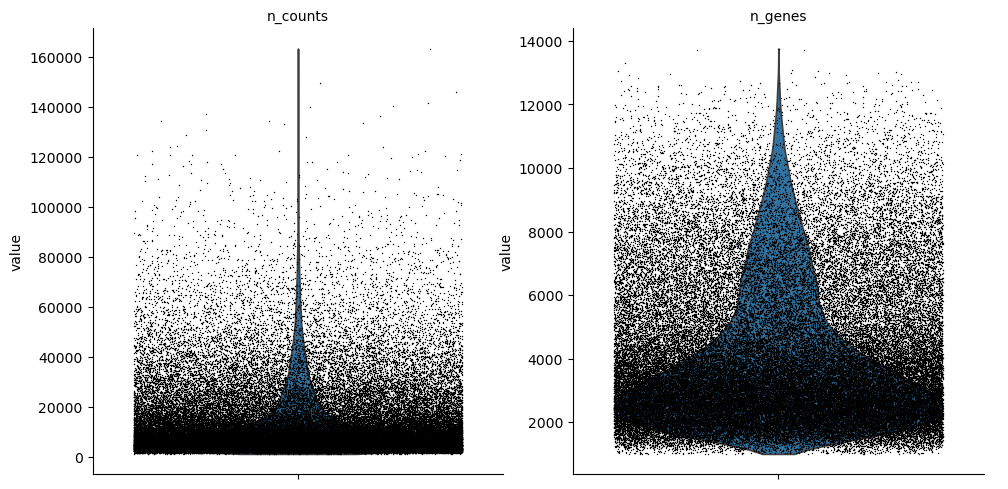

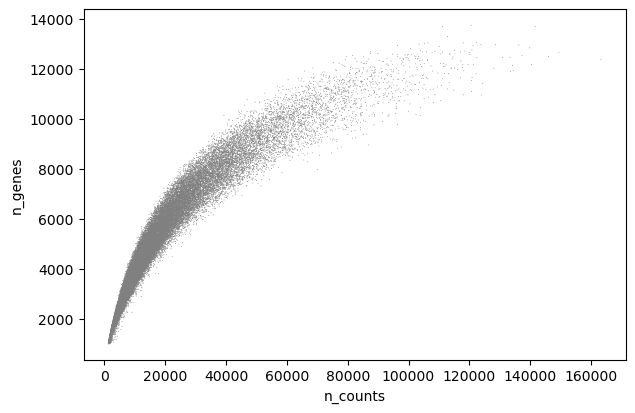

In [17]:
# 1. Calculation of QC metrics and addition to adata.obs
sc.pp.calculate_qc_metrics(adata, inplace = True)

# 2. Visualization of QC metrics before filtering
sc.pl.violin(
    adata, 
    ['n_counts', 'n_genes'], # Violin plot of number of genes and counts per cell
    jitter = 0.4,
    multi_panel = True
)

sc.pl.scatter(adata, x = 'n_counts', y = 'n_genes') # Scatter plot of number of genes vs. number of counts

### b - Filtering out low quality cells

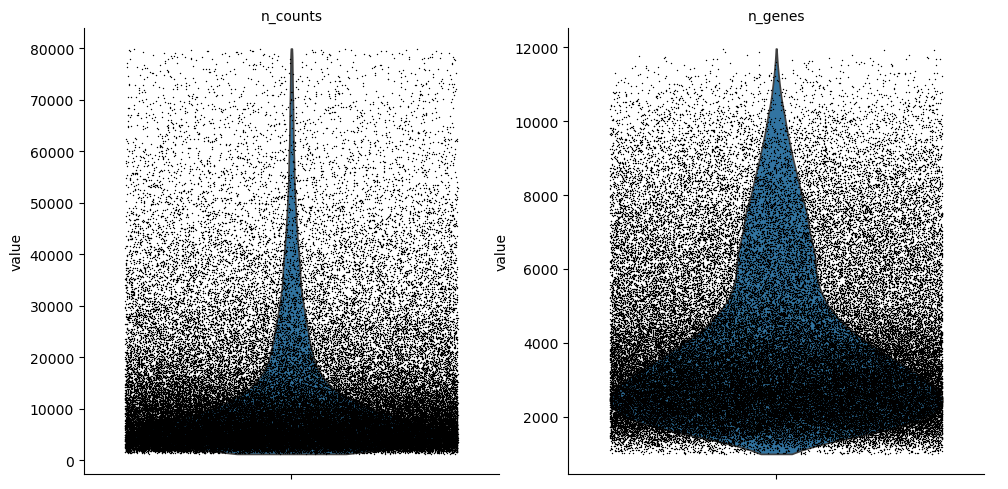

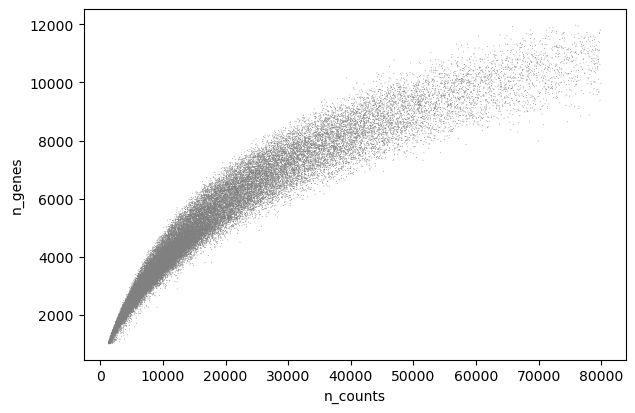

In [18]:
# 3. Application of filters
adata = adata[adata.obs['n_genes'] < 12000, :] # cutoff chosen: 12 000 genes

adata = adata[adata.obs['n_counts'] < 80000, :] # cutoff chosen: 80 000 counts

# 4. Visualization of QC metrics after filtering
sc.pl.violin(
    adata, 
    ['n_counts', 'n_genes'], # violin plot of number of genes and counts per cell
    jitter = 0.4,
    multi_panel = True
)

sc.pl.scatter(adata, x = 'n_counts', y = 'n_genes') # Scatter plot of number of genes vs. number of counts

### c - Filtering out mitochondrial genes

In [19]:
# Counting the number of mitochondrial genes
adata.var["mt"] = adata.var['gene_name'].str.startswith("MT-")

# Calculating QC metrics including the percentage of mitochondrial genes and adding them to adata.obs
sc.pp.calculate_qc_metrics(
    adata,
    qc_vars = ["mt"],
    inplace = True,
    log1p = True
)

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_16284/4025084783.py:2: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["mt"] = adata.var['gene_name'].str.startswith("MT-")


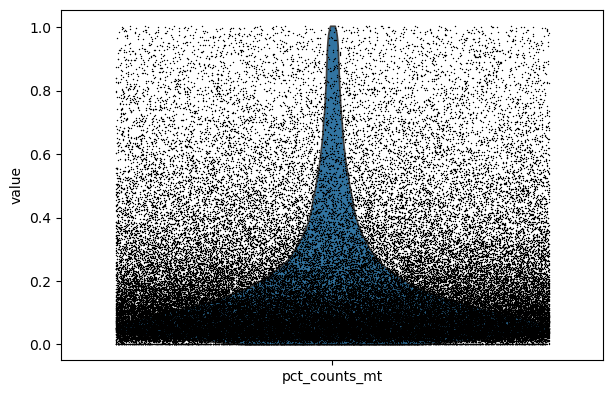

In [20]:
# Visualization of the percentage of mitochondrial genes
sc.pl.violin(
    adata,
    keys='pct_counts_mt',
    jitter = 0.4,
    rotation=  0,   
    stripplot = True,
    show = True
)

# data was already filtered on pct_counts_mt 
# it's weird because even before the filtering there was no cell with >10%. 
# They must have been filtered before
# I still keep the line just in case
# Filtering cells with more than 10% mitochondrial gene expression
adata_hvgadata = adata[adata.obs['pct_counts_mt'] < 10, :]


Here, we note that there were no cells with more than 10% mitochondrial gene expression in the dataset even before we applied our own filter. This means that the dataset did not contain such cells, either because of the nature of the data or because the dataset was already treated and filtered.

### d - Excluding ribosomal and hemoglobin genes
We will be keeping ribosomal genes, which make up 1.5% of genes expressed, and filtering out hemoglobin genes.

In [21]:
# 1m3s
# Ribosomal genes
adata.var["ribo"] = adata.var['gene_name'].str.startswith(("RPS", "RPL"))
print("proportion of ribo genes in all expressed genes : ", adata.var["ribo"].sum()/len(adata.var)*100)

# Hemoglobin genes
adata.var["hb"] = adata.var['gene_name'].str.contains("^HB[^(P)]")
print("Number of hemo genes before deletion : ", adata.var["hb"].sum())

# Confirming that hb genes were properly removed
genes_to_keep = ~adata.var["hb"]
adata = adata[:, genes_to_keep].copy()
print("Number of hemo genes after deletion: ", adata.var["hb"].sum())

proportion of ribo genes in all expressed genes :  1.5127574906367043
Number of hemo genes before deletion :  9
Number of hemo genes after deletion:  0


### e-important : répercuter le même filtrage sur adata_raw

In [22]:
adata_raw = adata_raw[adata.obs_names, adata.var_names].copy() #répercuter le même filtrage sur adata_raw

## 2. Normalization

this part was already performed, so we are not doing it again (How did they normalize?)

In [24]:
sc.pp.log1p(adata)

## 3. Highly Variable Genes (HVGs)

we kept 3000 highly variable genes out of 34167 genes


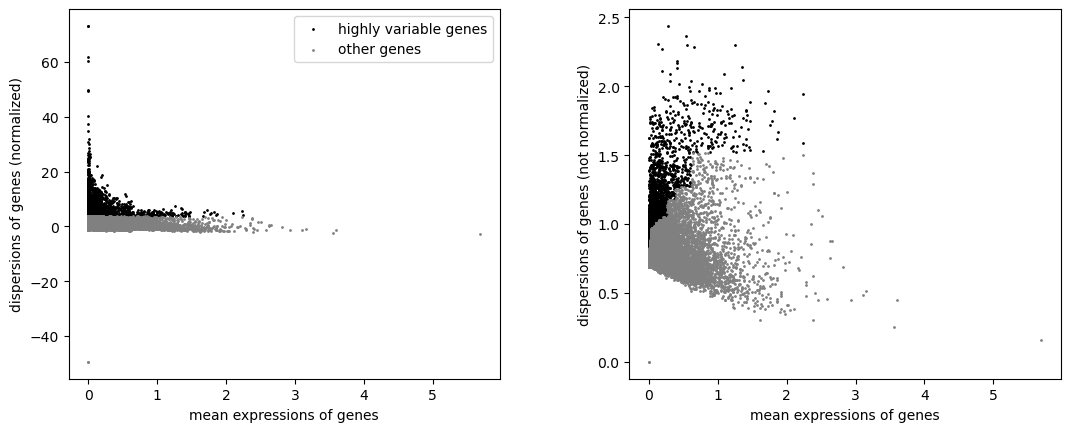

In [25]:
nHVG = 3000 

sc.pp.highly_variable_genes(
    adata, 
    flavor='cell_ranger',
    n_top_genes=nHVG
)

print("we kept", nHVG, "highly variable genes out of", adata.shape[1], "genes")
sc.pl.highly_variable_genes(adata)

In [26]:
adata.var['highly_variable'].value_counts()

highly_variable
False    31167
True      3000
Name: count, dtype: int64

new AnnData object with the HVG only

In [27]:
adata_hvg = adata[:, adata.var['highly_variable']].copy()

## 4. Scaling & PCA

In [28]:
# Scaling (3s)
sc.pp.scale(adata_hvg, max_value = 10)

/opt/anaconda3/envs/scanpy310/lib/python3.10/functools.py:889: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


In [29]:
# PCA (7min13)
sc.tl.pca(adata_hvg)


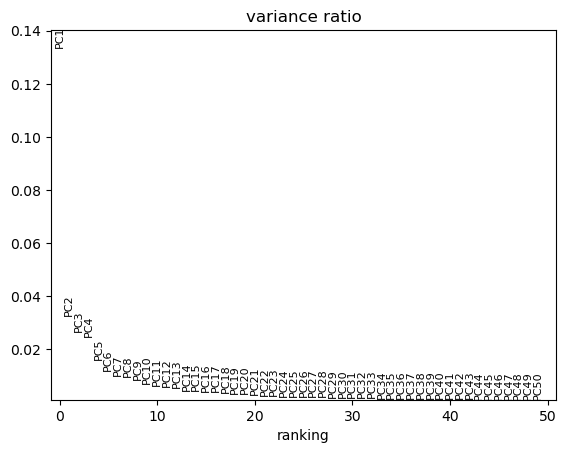

In [30]:
sc.pl.pca_variance_ratio(adata_hvg, n_pcs = 50) # elbow plot to see how many PCs to keep

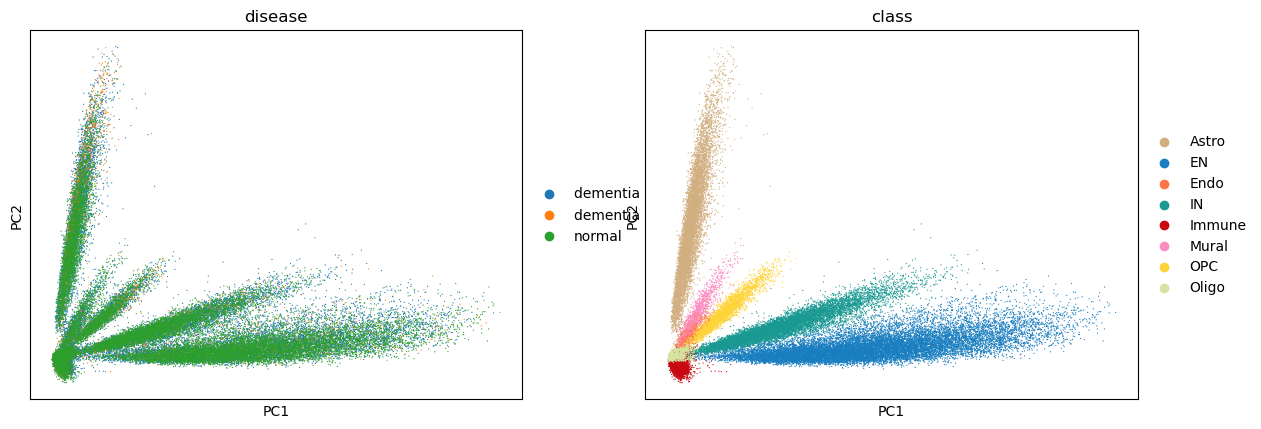

In [31]:
sc.pl.pca(
    adata_hvg,
    color = ["disease", "class"],
    ncols = 3,
    size = 3,
)

## Batch effect correction??

In [32]:
# 37 sec
import bbknn
# bbknn.bbknn(adata_hvg, batch_key='donor_id')
sc.external.pp.bbknn(adata_hvg, batch_key="donor_id")

/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 5. Clustering

In [33]:
adata_hvg.obs["class"].value_counts()

class
Oligo     29919
EN        17717
IN        10258
Astro      9235
Immune     4270
OPC        3085
Mural      1348
Endo        740
Name: count, dtype: int64

In [34]:
donors_by_class_and_subclass = (adata_hvg.obs.groupby(["class", "subclass"], observed=True)["donor_id"].nunique())
donors_by_class_and_subclass

class   subclass     
Astro   Astro            17
EN      EN_L2_3_IT       17
        EN_L3_5_IT_1     17
        EN_L3_5_IT_2     17
        EN_L3_5_IT_3     17
        EN_L5_6_NP       16
        EN_L5_ET          5
        EN_L6B           16
        EN_L6_CT         16
        EN_L6_IT_1       16
        EN_L6_IT_2       15
Endo    Endo             17
IN      IN_ADARB2        17
        IN_LAMP5_LHX6    17
        IN_LAMP5_RELN    17
        IN_PVALB         17
        IN_PVALB_CHC     17
        IN_SST           17
        IN_VIP           17
Immune  Micro            17
        PVM              16
        Adaptive         12
Mural   VLMC             16
        SMC              13
        PC               17
OPC     OPC              17
Oligo   Oligo            17
Name: donor_id, dtype: int64

### Neighbors

In [35]:
# 11 sec
# number of neighbors
# we chose 30 PCs because after that the variance ratio doesn't decrease that much
nPC = 30

sc.pp.neighbors(adata_hvg, n_pcs = nPC)

### Clustering

In [36]:
#import igraph
#import leidenalg

sc.tl.leiden(adata_hvg, resolution = 0.0009)

print("Number of clusters :", len(adata_hvg.obs['leiden'].cat.categories))

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_16284/1145431408.py:4: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_hvg, resolution = 0.0009)


Number of clusters : 7


### UMAP

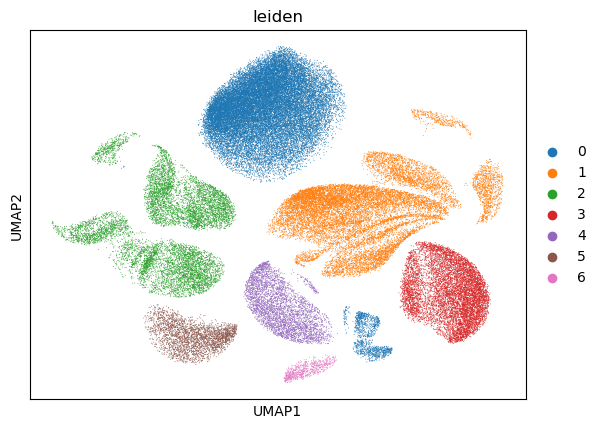

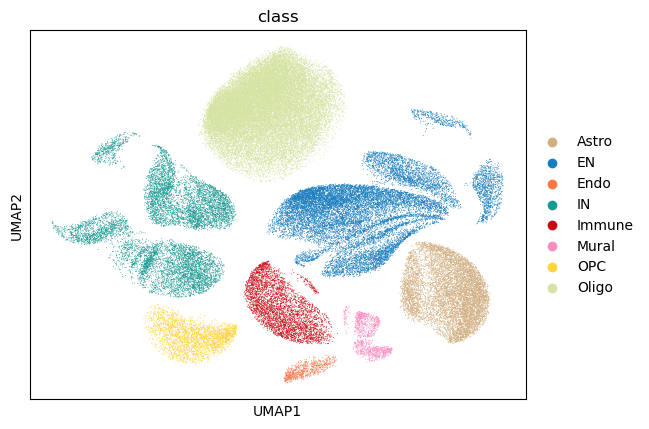

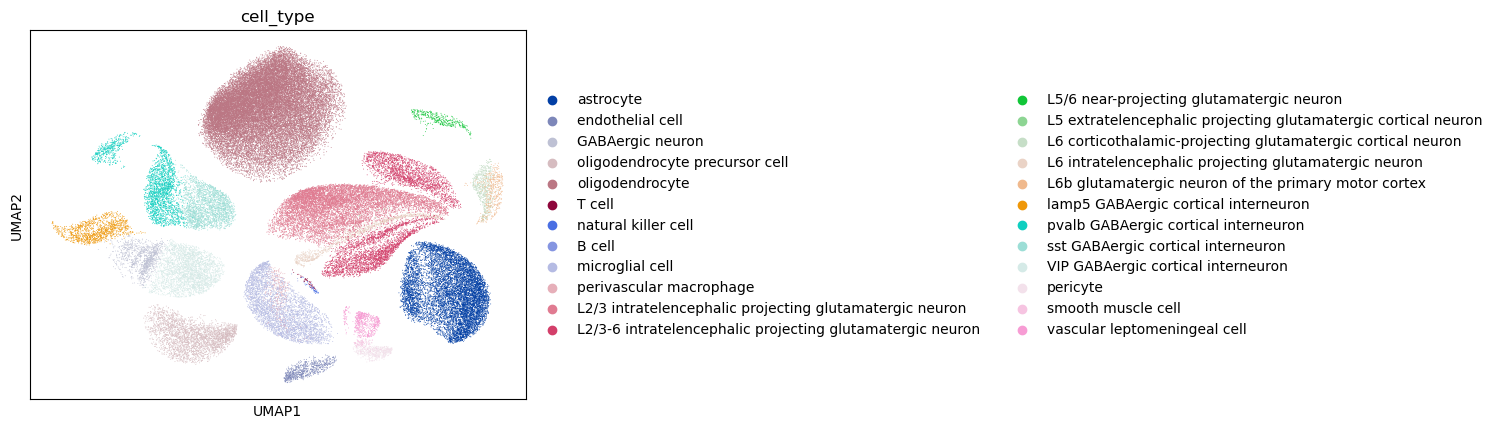

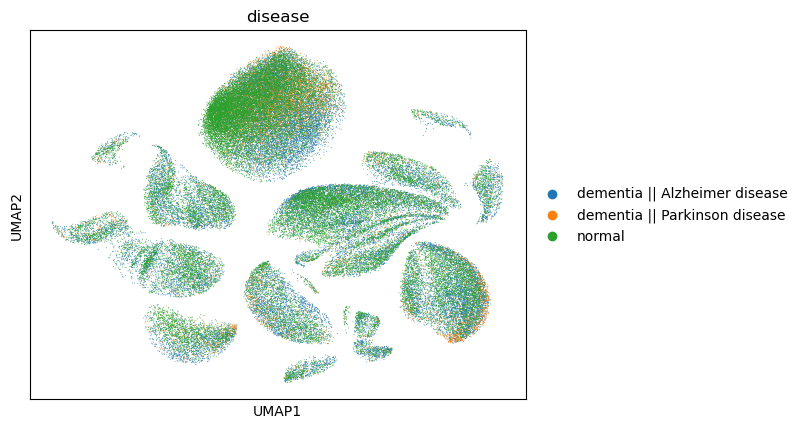

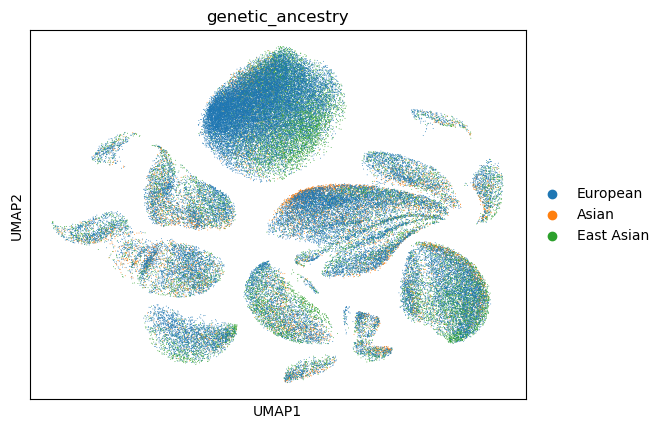

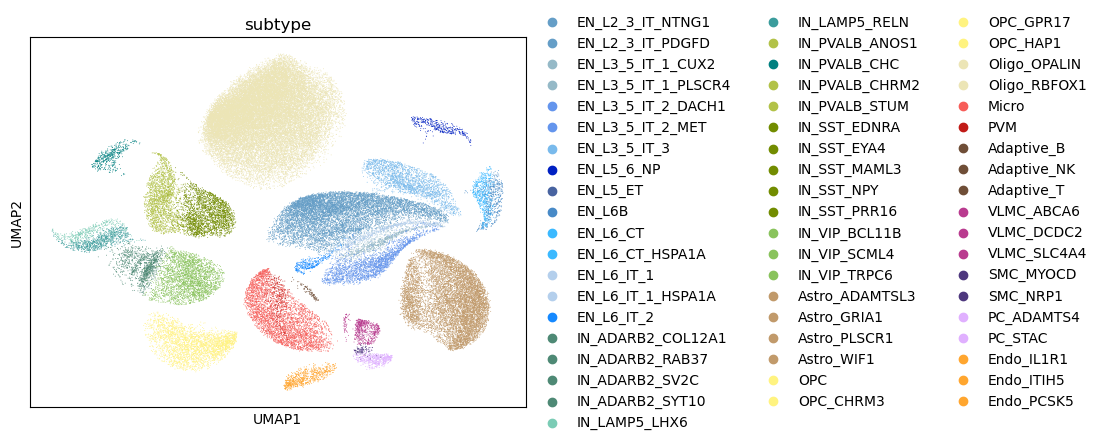

In [37]:
# UMAP

sc.pl.umap(adata_hvg, color="leiden")

sc.pl.umap(adata_hvg, color="class")

sc.pl.umap(adata_hvg, color='cell_type')

sc.pl.umap(adata_hvg, color="disease")
sc.pl.umap(adata_hvg, color="genetic_ancestry")

sc.pl.umap(adata_hvg, color='subtype')

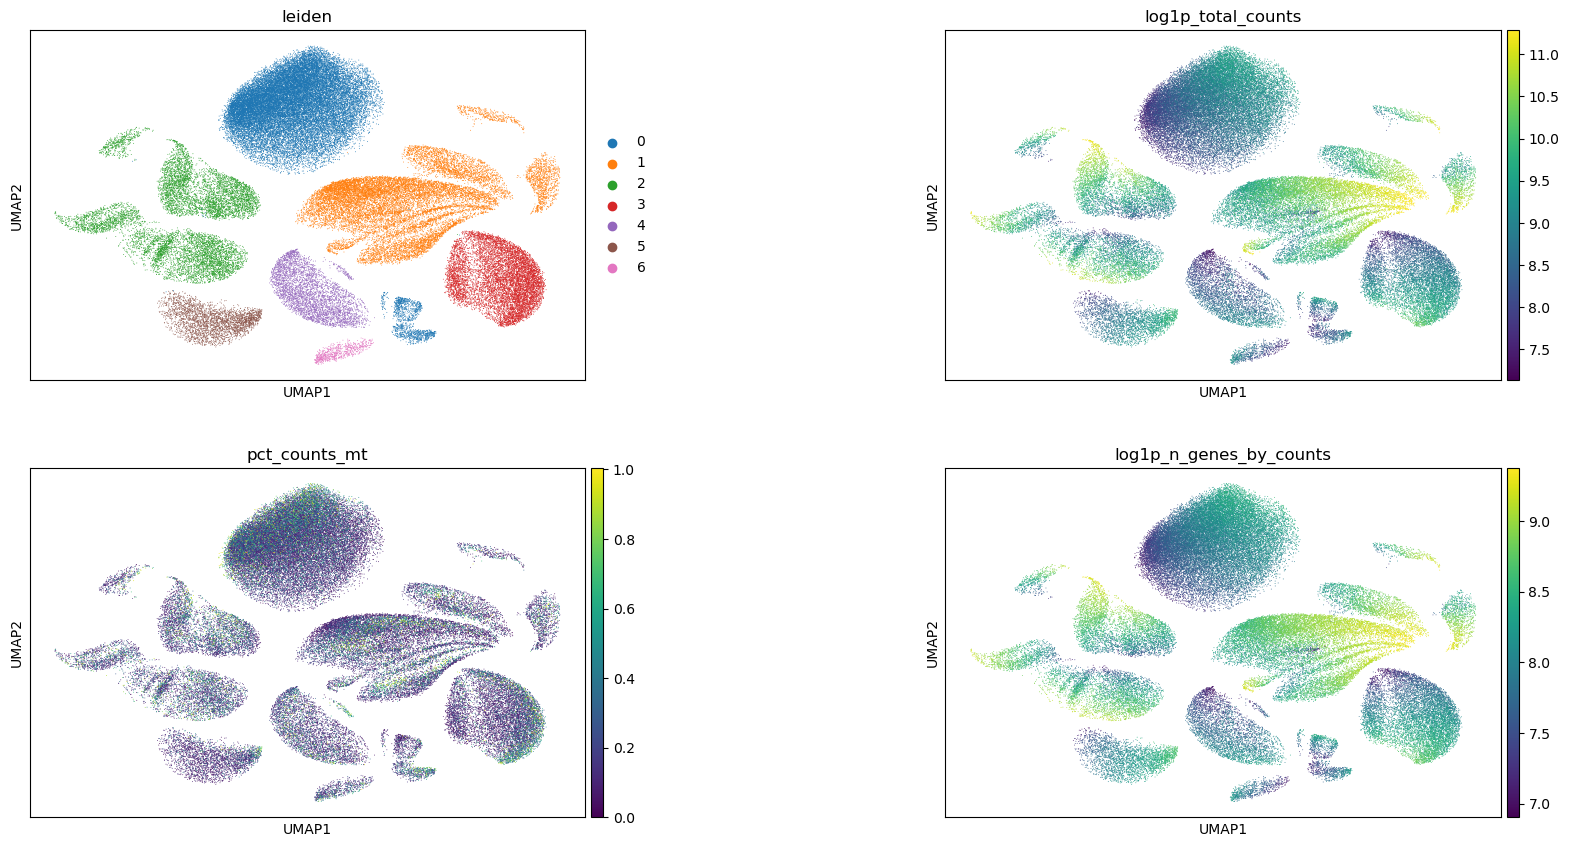

In [38]:
sc.pl.umap(
    adata_hvg,
    color = ["leiden", "log1p_total_counts", "pct_counts_mt", "log1p_n_genes_by_counts"],
    wspace = 0.5,
    ncols = 2,
)

## **6. Annotation**

### **6.1 Manual Annotation**

#### Marker gene set
We first define known marker genes of the cell types that we think are represented by the clusters. We only keep the genes in that list that are found in our data.

In [37]:
# Define marker genes for each cell type
marker_genes = {
    "Astro" : ["ENSG00000135821", "ENSG00000125398", "ENSG00000171885", "ENSG00000152661", "ENSG00000165795", "ENSG00000131095", "ENSG00000144908"],
    "Endo" : ["ENSG00000184113", "ENSG00000229515"],
    "Micro" : ["ENSG00000125730", "ENSG00000019582" ,"ENSG00000168329","ENSG00000182578", "ENSG00000173372"],
    "Oligo" : ["ENSG00000197971", "ENSG00000204655", "ENSG00000123560", "ENSG00000168314", "ENSG00000105695"],
    "OPC" : ["ENSG00000184221", "ENSG00000205927", "ENSG00000150275", "ENSG00000134853"],
    "EN" : ["ENSG00000070808", "ENSG00000154146", "ENSG00000119042", "ENSG00000104888"],
    "IN" : ["ENSG00000128683", "ENSG00000136750"],
    "Mural" : ["ENSG00000113721", "ENSG00000175084", "ENSG00000173546"]
    }

marker_genes

# Only keep the marker genes find in our data

marker_genes_in_data = {}
for ct, markers in marker_genes.items():
    markers_found = []
    for marker in markers:
        if marker in adata_hvg.var.index:
            markers_found.append(marker)
    marker_genes_in_data[ct] = markers_found

marker_genes_in_data
 

{'Astro': ['ENSG00000171885',
  'ENSG00000152661',
  'ENSG00000131095',
  'ENSG00000144908'],
 'Endo': ['ENSG00000184113'],
 'Micro': ['ENSG00000125730',
  'ENSG00000019582',
  'ENSG00000168329',
  'ENSG00000182578'],
 'Oligo': [],
 'OPC': ['ENSG00000150275', 'ENSG00000134853'],
 'EN': ['ENSG00000119042'],
 'IN': ['ENSG00000128683', 'ENSG00000136750'],
 'Mural': []}

Listing cell types we want to show the markers for:

In [38]:
cell_types = ["Astro", "Endo", "Micro", "Oligo", "OPC", "EN", "IN", "Mural"]
cell_types

['Astro', 'Endo', 'Micro', 'Oligo', 'OPC', 'EN', 'IN', 'Mural']

Plotting one UMAP per marker for each cell type:

ASTRO:


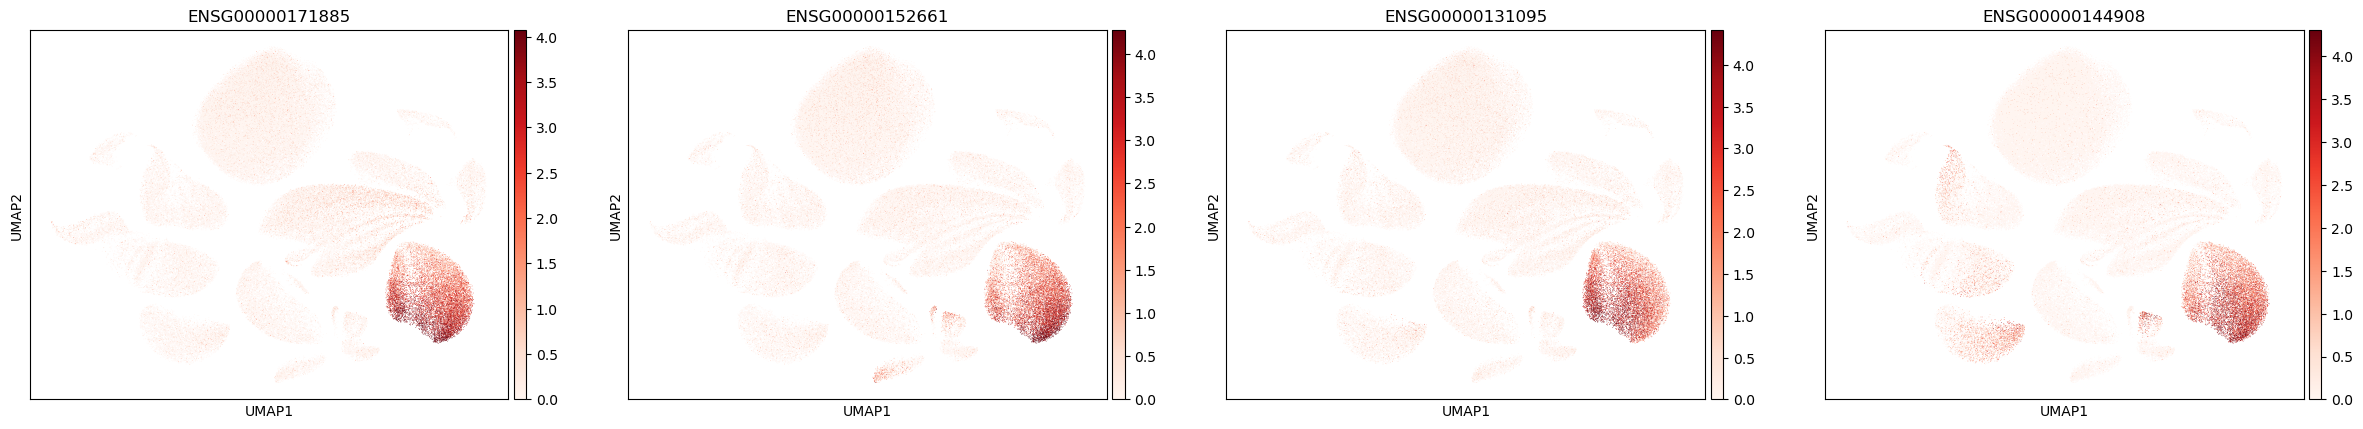





ENDO:


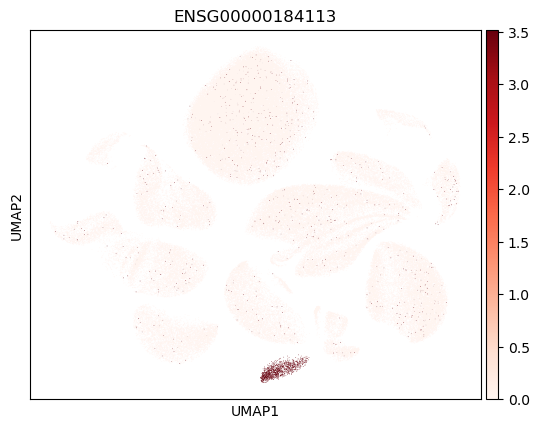





MICRO:


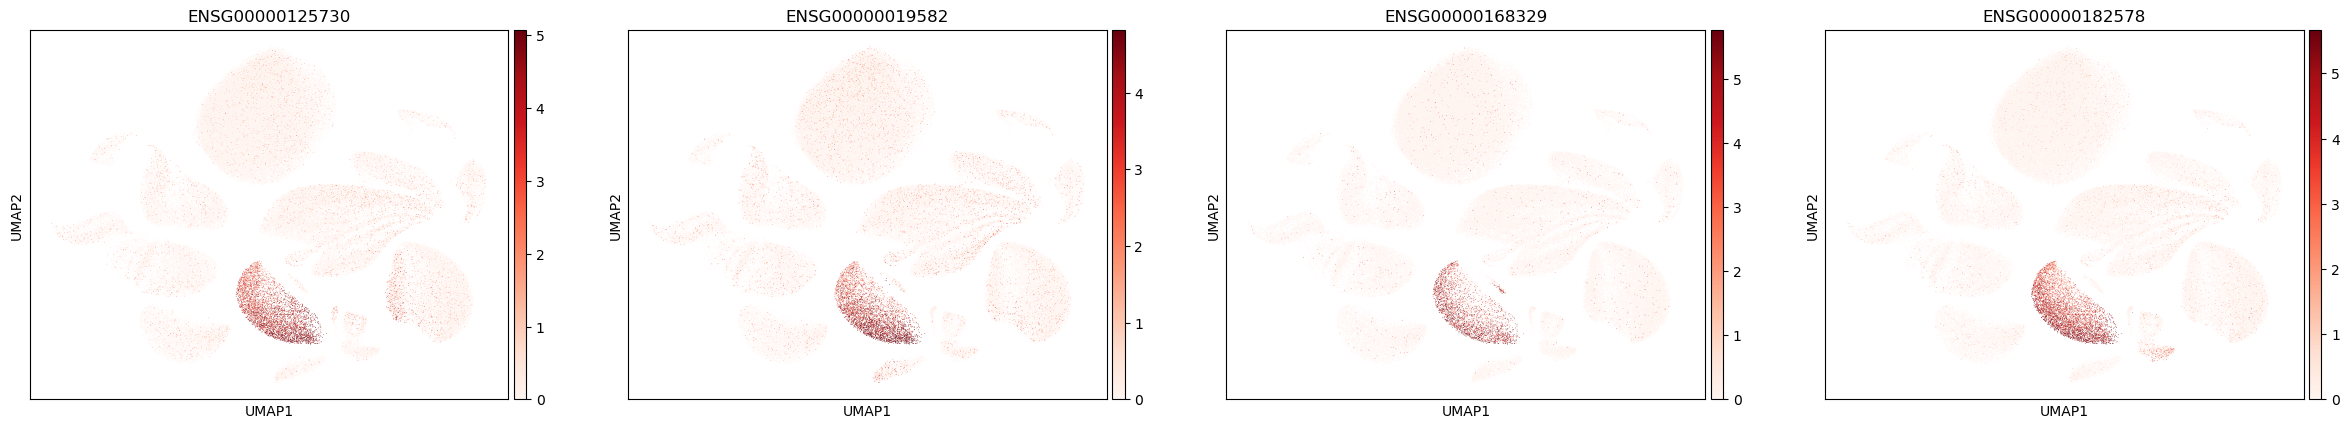





OLIGO: No marker genes found in data.

OPC:


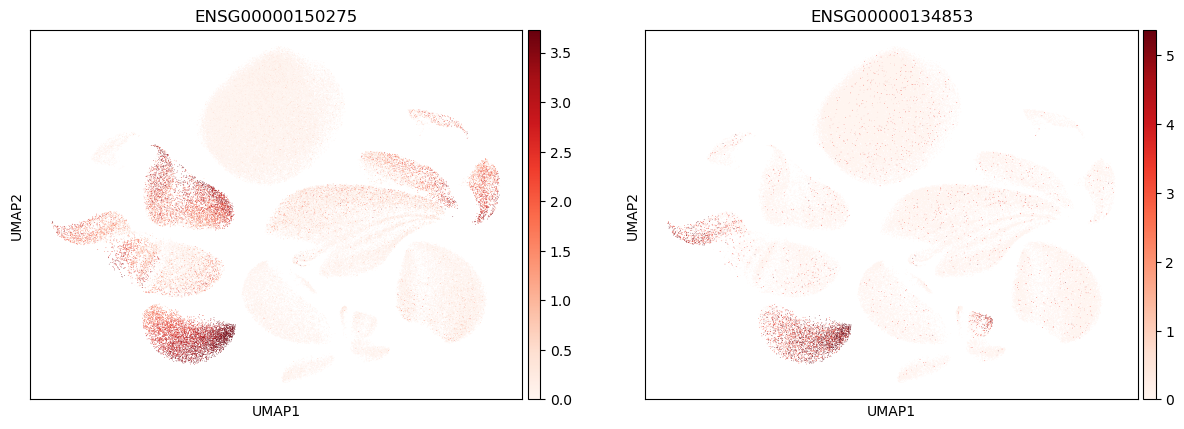





EN:


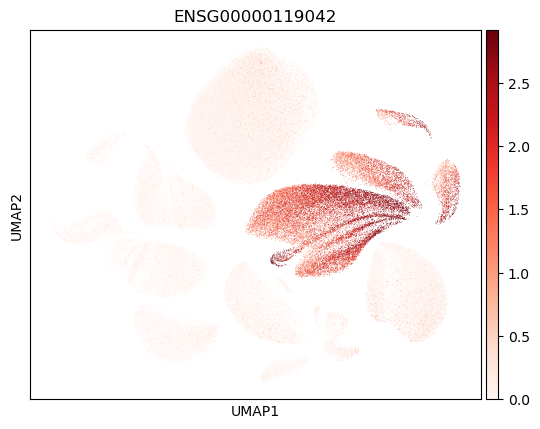





IN:


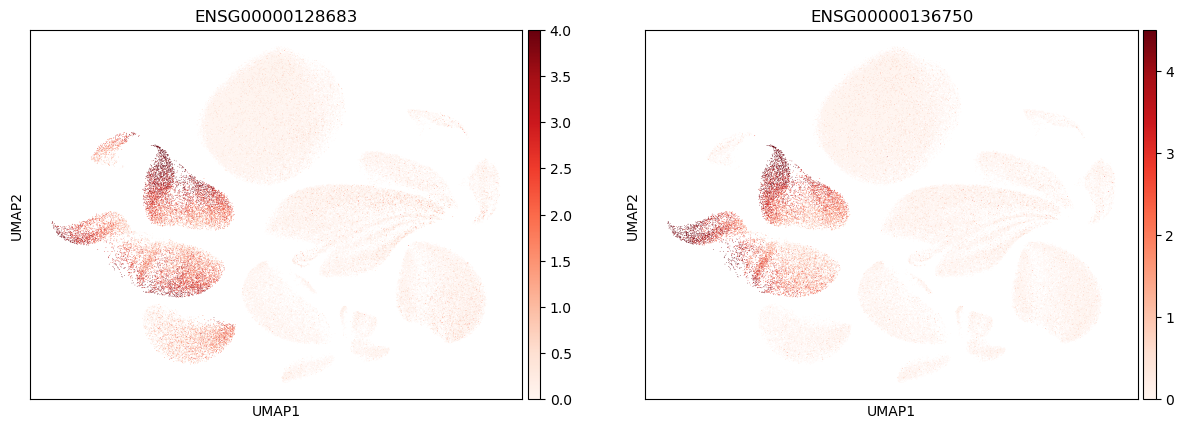





MURAL: No marker genes found in data.



In [39]:
for ct in cell_types:
    markers = marker_genes_in_data[ct]
    if not markers:  # Skip if the list is empty
        print(f"{ct.upper()}: No marker genes found in data.\n")
        continue
    
    print(f"{ct.upper()}:")  # print cell subtype name
    sc.pl.umap(
        adata_hvg,
        color = markers,
        vmin = 0,
        vmax = "p99",
        sort_order = False,
        cmap = "Reds",
    )
    
    print("\n\n\n")  # print white space for legibility

Dotplot visualization of marker gene expression per cluster:

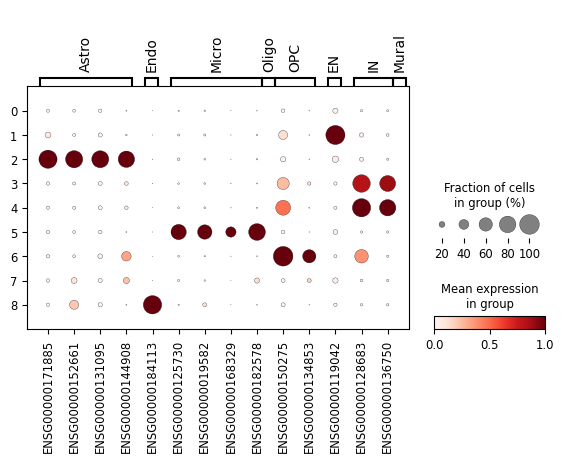

In [40]:
sc.pl.dotplot(
    adata_hvg,
    groupby = "leiden",
    var_names = marker_genes_in_data,
    standard_scale = "var",  # standard scale: normalize each gene to range from 0 to 1
)

Referring to both representations, we can manually annotate the clusters:

In [41]:
cl_annotation = {
    "0": "Oligo",
    "1": "EN",
    "2": "Astro", # and mural? 
    "3": "Micro",
    "4": "IN", 
    "5" : "IN", # need to find distinguishing markers from cluster 4
    "6" : "OPC",
    "7" : "Endo"
}

To visualize the annotations:

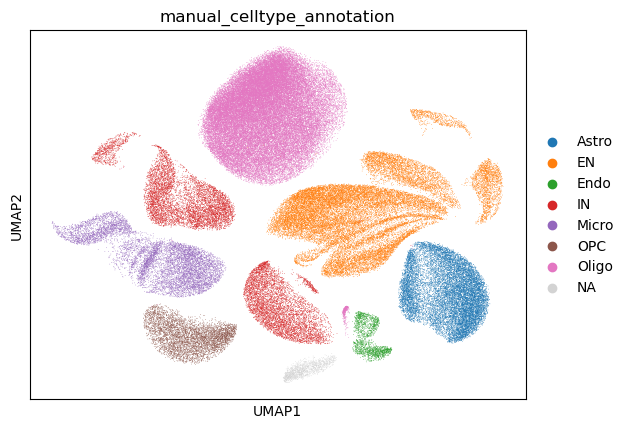

In [42]:
adata_hvg.obs["manual_celltype_annotation"] = adata_hvg.obs.leiden.map(cl_annotation)

sc.pl.umap(adata_hvg, color = ["manual_celltype_annotation"])

To confirm our annotations, we can find the differentially expressed genes for each cluster as compared to the others. We also want to use this to distinguish clusters 4 and 5.

/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchange

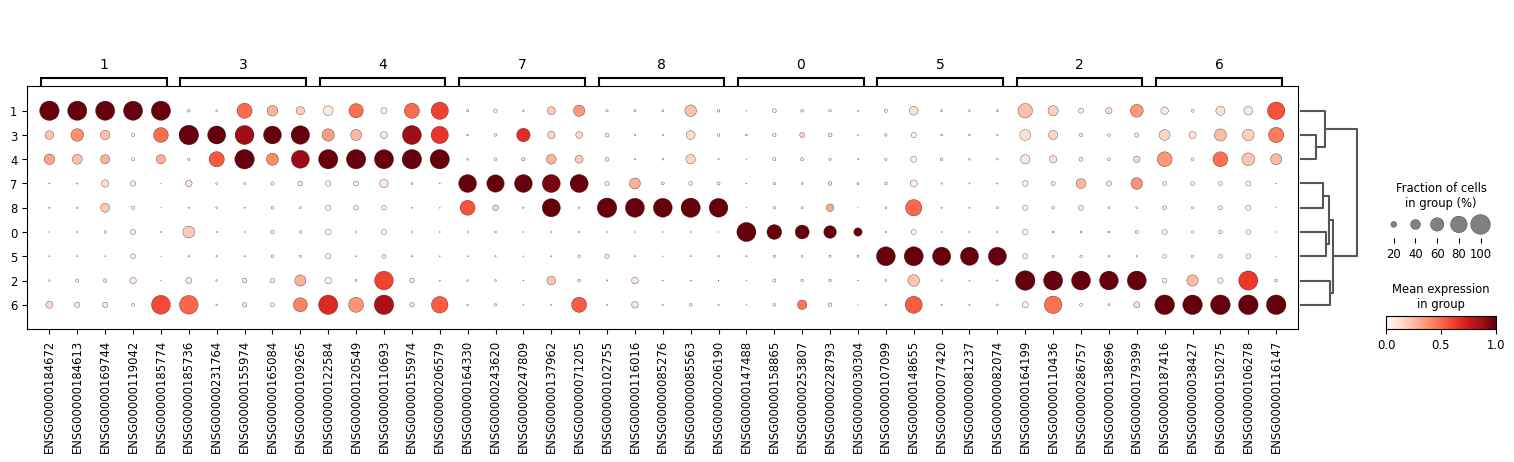

In [43]:
# Calculating differentially expressed genes for each cluster 
    ## We are using the rank_genes_groups function from scanpy for annotations, but for downstream analyses, we will do pseudo-bulk differential expression to avoid pseudoreplication issues

sc.tl.rank_genes_groups(
    adata_hvg, groupby = "leiden", method = "wilcoxon", key_added = "dea_leiden"
)

# Visualizing the expression of the 5 top DE genes per cluster (dotplot representation)
sc.pl.rank_genes_groups_dotplot(
    adata_hvg, groupby = "leiden", standard_scale = "var", n_genes = 5, key = "dea_leiden"
)

### **6.2 Automated Annotation**
We thought it would be interesting to attempt automated annotation of our clusters based on a wider set of genes, using CellTypist *[Conde et al, 2022]*.

In [44]:
import celltypist # Install the package if needed.
from celltypist import models, annotate

/opt/anaconda3/envs/scanpy310/lib/python3.10/site-packages/celltypist/classifier.py:11: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('scanpy')` instead
  from scanpy import __version__ as scv


In [45]:
# To make our data compatible with CellTypist:

adata_celltypist = adata_hvg.copy() 

sc.pp.normalize_total(
    adata_celltypist, target_sum=10**4
)  # normalize to 10,000 counts per cell

sc.pp.log1p(adata_celltypist)  # log-transform

In [46]:
type(adata_celltypist.X)

adata_celltypist.X

array([[        nan,         nan,  3.454208  , ...,         nan,
                nan,         nan],
       [ 1.39676013,  1.12285155,  2.73702403, ...,  1.56358871,
         1.91403229,  0.95257821],
       [ 2.17776443,  1.84607293,  2.00158481, ...,  2.37160401,
         2.76452634,  1.62861784],
       ...,
       [ 1.3064702 ,  1.04230133,  2.6235368 , ...,  1.46851459,
         1.81111867,  0.87950916],
       [        nan, -2.69166873,  2.91623529, ...,         nan,
                nan, -1.25839113],
       [ 1.37132888,  1.10008466,  2.70532261, ...,  1.53685561,
         1.88517573,  0.93187067]], shape=(128224, 3000))

To download the CellTypist model for the human prefrontal cortex:

In [47]:
models.download_models(force_update = True, model = "Adult_Human_PrefrontalCortex.pkl")
celltypistmodel = models.Model.load(model = "Adult_Human_PrefrontalCortex.pkl")

celltypistmodel
celltypistmodel.cell_types
celltypistmodel.features


📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 59
📂 Storing models in /Users/elodiehusson/.celltypist/data/models
💾 Total models to download: 1
💾 Downloading model [1/1]: Adult_Human_PrefrontalCortex.pkl


array(['ISG15', 'GABRD', 'PRDM16', ..., 'BGN', 'SRPK3', 'GAB3'],
      shape=(4304,), dtype=object)

Convert Ensembl IDs to gene symbols in dataset to match Cell Typist model:

In [48]:
pip install pybiomart

Note: you may need to restart the kernel to use updated packages.


To predict cell identities using the "Adult_Human_PrefrontalCortex" model:

In [49]:
#predictions = celltypist.annotate(adata_celltypist, model = "Adult_Human_PrefrontalCortex.pkl", majority_voting = True)

## **7. Differential Gene Expression**

### *Pseudobulk*

check the number of donors per cell type, we need to delete the whole line when there are none in one condition.

<!-- Here, there are zero donors in CONTROL for B cells. We do the DE without it. Also, note to ourselves for when writting, the cell types that have very few donors are statistically weak ! very important -->

In [39]:
adata_raw.obs.groupby(["class", "disease"]).size().unstack(fill_value=0)

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_16284/2033793815.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata_raw.obs.groupby(["class", "disease"]).size().unstack(fill_value=0)


disease  dementia || Alzheimer disease  dementia || Parkinson disease  normal
class                                                                        
Astro                             4620                           1128    3487
EN                                7602                            804    9311
Endo                               417                             39     284
IN                                4695                            539    5024
Immune                            2188                            383    1699
Mural                              684                             69     595
OPC                               1256                            323    1506
Oligo                            10242                           4461   15216

In [144]:
x = (adata_raw.obs.groupby([ "disease"], observed=True)["donor_id"].nunique())
x

disease
dementia || Alzheimer disease    8
dementia || Parkinson disease    3
normal                           6
Name: donor_id, dtype: int64

In [ ]:
# 16sec
df = adata_raw.to_df()  # 
# metadata alignées avec les cellules
meta = adata_raw.obs[["donor_id", "class", "disease"]]

df["donor_id"] = meta["donor_id"].values
df["class"] = meta["class"].values
df["disease"] = meta["disease"].values

In [99]:
adata_raw.shape[1]+3

34170

In [ ]:
pb = (df.groupby(["class", "donor_id", "disease"]).sum())
# supprimer groupes vides
pb = pb[pb.sum(axis=1) != 0]
pb = pb.reset_index()


if pb.shape[0] == len((adata.obs["donor_id"].cat.categories))* len((adata.obs["class"].cat.categories)) and pb.shape[1] == len(adata_raw.var)+3 :
    print("Dataframe IS OK : no donor or gene were deleted")
else : 
    print("WARNING : wrong number of donors")
pb

# if we use the huge dataset : 
# suppression des B cells + plasma cells
# pb_wo_Bcells = pb[~pb["class"].isin(["B cell", "plasma cell"])]

/var/folders/k4/d0pwylgd1tl4mf2_hqnm6l400000gn/T/ipykernel_16284/3518304143.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pb = (df.groupby(["class", "donor_id", "disease"]).sum())


length of pb is ok, no donor was deleted


class    donor_id                        disease  ENSG00000000003  \
0    Astro    Donor_31  dementia || Alzheimer disease             71.0   
1    Astro   Donor_228  dementia || Alzheimer disease             63.0   
2    Astro   Donor_333  dementia || Alzheimer disease            110.0   
3    Astro   Donor_545  dementia || Parkinson disease             19.0   
4    Astro   Donor_609                         normal             60.0   
..     ...         ...                            ...              ...   
131  Oligo  Donor_1001  dementia || Alzheimer disease              5.0   
132  Oligo  Donor_1007  dementia || Alzheimer disease              0.0   
133  Oligo  Donor_1146                         normal             10.0   
134  Oligo  Donor_1278                         normal              8.0   
135  Oligo  Donor_1467  dementia || Parkinson disease              1.0   

     ENSG00000000005  ENSG00000000419  ENSG00000000457  ENSG00000000460  \
0                7.0            242.0            173.0            139.0   
1                1.0            258.0            197.0            123.0   
2               12.0            140.0            102.0            101.0   
3                3.0            154.0            112.0             69.0   
4                6.0            245.0            156.0            106.0   
..               ...              ...              ...              ...   
131              0.0            293.0            204.0            266.0   
132              0.0             15.0             11.0             15.0   
133              0.0            319.0            213.0            165.0   
134              1.0            808.0            516.0            642.0   
135              0.0             55.0             38.0             35.0   

     ENSG00000000938  ENSG00000000971  ...  ENSG00000288600  ENSG00000288602  \
0                1.0              4.0  ...              0.0             98.0   
1                2.0              1.0  ...              1.0            119.0   
2                1.0              5.0  ...              0.0             69.0   
3                1.0              1.0  ...              0.0             91.0   
4                2.0              8.0  ...              0.0            121.0   
..               ...              ...  ...              ...              ...   
131              6.0             18.0  ...              0.0            164.0   
132              0.0              1.0  ...              0.0              4.0   
133              4.0              7.0  ...              0.0             85.0   
134              5.0             30.0  ...              2.0            270.0   
135              0.0              1.0  ...              0.0             25.0   

     ENSG00000288605  ENSG00000288606  ENSG00000288611  ENSG00000288612  \
0               37.0              6.0              0.0             21.0   
1               25.0             10.0              1.0             30.0   
2               13.0              7.0              1.0             18.0   
3               21.0              7.0              1.0             19.0   
4               13.0             12.0              1.0             27.0   
..               ...              ...              ...              ...   
131              3.0             50.0              1.0             38.0   
132              0.0              4.0              0.0              3.0   
133              3.0             31.0              0.0             29.0   
134              0.0             74.0              2.0             69.0   
135              1.0              5.0              0.0              5.0   

     ENSG00000288622  ENSG00000288637  ENSG00000288642  ENSG00000288643  
0                4.0              3.0             15.0             13.0  
1                3.0              5.0             10.0             17.0  
2                1.0              3.0             39.0             16.0  
3                2.0              6.0             13.0   

pseudo-bulk matrix (=pb) : 

- lines : cell type per donor 
- columns : mean expression levels

each donor is an indepedant observation. We cannot compare each cell one by one because it's statistically false. We do a pseudo-bulk donor x cell type.

Each value corresponds to the mean log-normalized of 1 donor for 1 cell type

In [ ]:
# saving pb : 4sec
pb.to_csv("pseudobulk_matrix.csv", index = False)

la suite dans R

load DE results 

logFC    logCPM          F        PValue       FDR
ENSG00000026508 -2.192966  1.817744  75.958392  5.298840e-09  0.000116
ENSG00000259520 -2.348001  2.874461  41.200614  1.394094e-06  0.015099
ENSG00000188393  4.813545  0.349007  33.295073  2.076138e-06  0.015099
ENSG00000225231  4.497031  1.948137  32.146706  7.784117e-06  0.042458

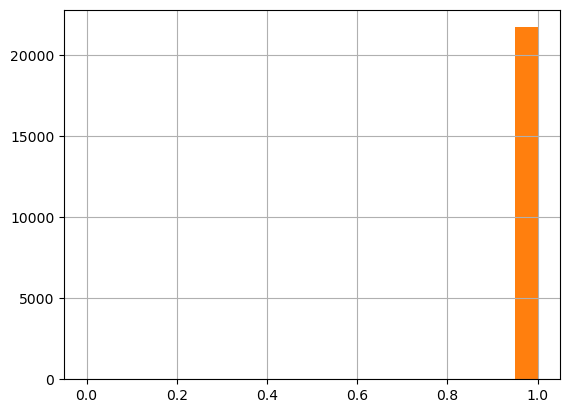

In [202]:
x = pd.read_csv("edgeR_results/edgeR_IN_AD_vs_CTRL.csv",index_col=0)
x[x["FDR"]<0.05]["FDR"].hist(bins=20) # histogram of the DEG !!
x["FDR"].hist(bins=20) # histogram of the padj
x[x["FDR"]<0.05] # every gene where padj < 0.05


## **JUSTIFYING THAT THE DATASET IS IN RAW COUNTS**

In [50]:
import numpy as np
from scipy import sparse

X = adata.X
X_csr = X if sparse.issparse(X) else sparse.csr_matrix(X)

data = X_csr.data  # valeurs non nulles

# Écart max entre la valeur et l’entier le plus proche
max_frac = np.max(np.abs(data - np.round(data)))
print("Max difference to integer:", max_frac)

Max difference to integer: 0.49997663


In [51]:
import numpy as np

cell_sums = np.array(X_csr.sum(axis=1)).ravel()

print("Premieres sommes de X:", cell_sums[:10])
print("Premier n_counts:", adata.obs["n_counts"].head(10).values)

print("Tout pareil ? ", np.allclose(cell_sums, adata.obs["n_counts"].values))

Premieres sommes de X: [ 2934.5508   827.2049  2892.3923  2957.928   7648.7583  1224.5441
  1764.7788 10337.452   2810.9097  6597.6006]
Premier n_counts: [ 6236.  1444.  6086.  6582. 27425.  2493.  3504. 36665.  6796. 17375.]
Tout pareil ?  False


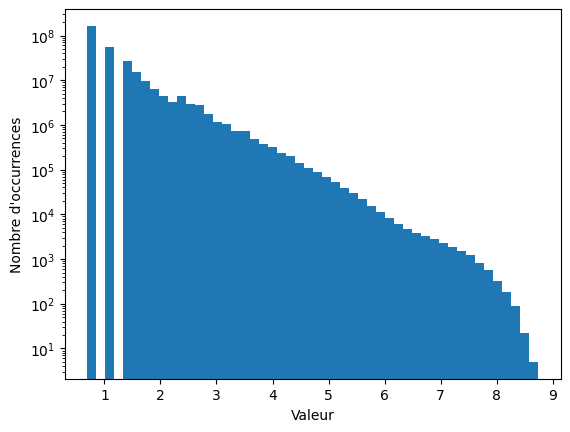

Min non-zero: 0.6931472
Max: 8.739536


KeyboardInterrupt: 

In [52]:
import matplotlib.pyplot as plt

vals = data  # non-zero
plt.hist(vals, bins=50)
plt.yscale("log")
plt.xlabel("Valeur")
plt.ylabel("Nombre d'occurrences")
plt.show()

print("Min non-zero:", vals.min())
print("Max:", vals.max())
print("Quelques valeurs uniques:", np.unique(vals)[:20])
print("Nb de valeurs distinctes:", len(np.unique(vals)))

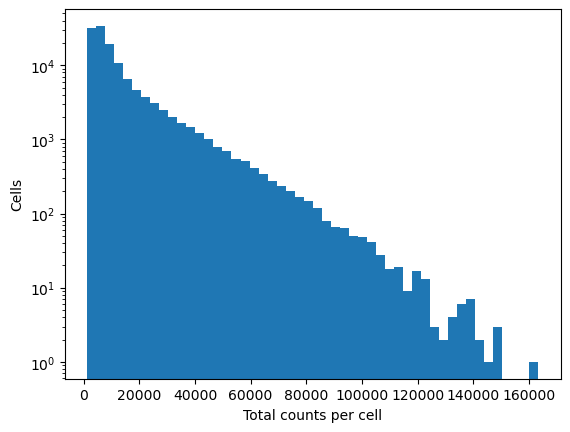

count    128932.000000
mean      12646.060547
std       14012.671875
min        1247.000000
25%        4501.000000
50%        7540.000000
75%       14416.000000
max      163298.000000
Name: n_counts, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

plt.hist(adata.obs["n_counts"], bins=50)
plt.xlabel("Total counts per cell")
plt.ylabel("Cells")
plt.yscale("log")
plt.show()

print(adata.obs["n_counts"].describe())

In [ ]:
import numpy as np

vals = data
print("quantiles X:", np.quantile(vals, [0.5, 0.9, 0.99, 0.999]))

log_vals = np.log1p(vals)
print("quantiles log1p(X):", np.quantile(log_vals, [0.5, 0.9, 0.99, 0.999]))

quantiles X: [  1.   6.  30. 127.]
quantiles log1p(X): [0.69314718 1.9459101  3.43398714 4.85203028]


In [ ]:
max_frac
np.allclose(cell_sums, adata.obs["n_counts"])
vals.min(), vals.max()
np.unique(vals)[:20]
len(np.unique(vals))
adata.obs["n_counts"].describe()

count    128932.000000
mean      12646.060547
std       14012.671875
min        1247.000000
25%        4501.000000
50%        7540.000000
75%       14416.000000
max      163298.000000
Name: n_counts, dtype: float64

## **9. GSEA**

Importing packages:

In [25]:
import pandas as pd
import glob
import gseapy as gp
import os
import numpy as np

Loading the DE results:

In [34]:
files = glob.glob("edgeR_results/*.csv")
files

['edgeR_results\\edgeR_Astro_AD_vs_CTRL.csv',
 'edgeR_results\\edgeR_Astro_AD_vs_PD.csv',
 'edgeR_results\\edgeR_Astro_PD_vs_CTRL.csv',
 'edgeR_results\\edgeR_Endo_AD_vs_CTRL.csv',
 'edgeR_results\\edgeR_Endo_AD_vs_PD.csv',
 'edgeR_results\\edgeR_Endo_PD_vs_CTRL.csv',
 'edgeR_results\\edgeR_EN_AD_vs_CTRL.csv',
 'edgeR_results\\edgeR_EN_AD_vs_PD.csv',
 'edgeR_results\\edgeR_EN_PD_vs_CTRL.csv',
 'edgeR_results\\edgeR_Immune_AD_vs_CTRL.csv',
 'edgeR_results\\edgeR_Immune_AD_vs_PD.csv',
 'edgeR_results\\edgeR_Immune_PD_vs_CTRL.csv',
 'edgeR_results\\edgeR_IN_AD_vs_CTRL.csv',
 'edgeR_results\\edgeR_IN_AD_vs_PD.csv',
 'edgeR_results\\edgeR_IN_PD_vs_CTRL.csv',
 'edgeR_results\\edgeR_Mural_AD_vs_CTRL.csv',
 'edgeR_results\\edgeR_Mural_AD_vs_PD.csv',
 'edgeR_results\\edgeR_Mural_PD_vs_CTRL.csv',
 'edgeR_results\\edgeR_Oligo_AD_vs_CTRL.csv',
 'edgeR_results\\edgeR_Oligo_AD_vs_PD.csv',
 'edgeR_results\\edgeR_Oligo_PD_vs_CTRL.csv',
 'edgeR_results\\edgeR_OPC_AD_vs_CTRL.csv',
 'edgeR_results\\edgeR

We first need to match the gene IDs in our list to those in the gene set libraries that will be used later:

In [38]:
import mygene # Make sure to install package if needed
mg = mygene.MyGeneInfo()

# After loading DF
for file in files:
    print("Reading:", file)
    df = pd.read_csv(file)
df = pd.read_csv(file)

# Remove version numbers from Ensembl IDs (e.g. ENSG000001234.5 → ENSG000001234)
df["gene"] = df["gene"].str.split(".").str[0]

# Query mygene for gene symbols
out = mg.querymany(df["gene"].tolist(), scopes = "ensembl.gene", fields = "symbol", species = "human")

# Make a mapping dictionary
mapping = {item["query"]: item.get("symbol", None) for item in out}

# Apply the mapping
df["gene_symbol"] = df["gene"].map(mapping)

# Drop rows without a valid gene symbol
df = df.dropna(subset = ["gene_symbol"])

# Use uppercase gene symbols
df["gene_symbol"] = df["gene_symbol"].str.upper()

# Use this for GSEA
df.rename(columns={"gene_symbol": "gene"}, inplace=True)

Reading: edgeR_results\edgeR_Astro_AD_vs_CTRL.csv
Reading: edgeR_results\edgeR_Astro_AD_vs_PD.csv
Reading: edgeR_results\edgeR_Astro_PD_vs_CTRL.csv
Reading: edgeR_results\edgeR_Endo_AD_vs_CTRL.csv
Reading: edgeR_results\edgeR_Endo_AD_vs_PD.csv
Reading: edgeR_results\edgeR_Endo_PD_vs_CTRL.csv
Reading: edgeR_results\edgeR_EN_AD_vs_CTRL.csv
Reading: edgeR_results\edgeR_EN_AD_vs_PD.csv
Reading: edgeR_results\edgeR_EN_PD_vs_CTRL.csv
Reading: edgeR_results\edgeR_Immune_AD_vs_CTRL.csv
Reading: edgeR_results\edgeR_Immune_AD_vs_PD.csv
Reading: edgeR_results\edgeR_Immune_PD_vs_CTRL.csv
Reading: edgeR_results\edgeR_IN_AD_vs_CTRL.csv
Reading: edgeR_results\edgeR_IN_AD_vs_PD.csv
Reading: edgeR_results\edgeR_IN_PD_vs_CTRL.csv
Reading: edgeR_results\edgeR_Mural_AD_vs_CTRL.csv
Reading: edgeR_results\edgeR_Mural_AD_vs_PD.csv
Reading: edgeR_results\edgeR_Mural_PD_vs_CTRL.csv
Reading: edgeR_results\edgeR_Oligo_AD_vs_CTRL.csv
Reading: edgeR_results\edgeR_Oligo_AD_vs_PD.csv
Reading: edgeR_results\edgeR_Oli

KeyError: 'gene'

In [32]:
# Verify how many genes were mapped
print("Total rows:", len(df))
print("With gene_symbol:", df["gene_symbol"].notna().sum())

Total rows: 34167


KeyError: 'gene_symbol'

GSEA requires a ranked list of genes. To rank our genes for each file, we can create a function:

In [28]:
def prepare_ranking(df):
    df = df.dropna(subset = ["gene", "log2FoldChange", "pvalue"])
    df["ranking"] = df["log2FoldChange"] * -np.log10(df["pvalue"])
    df = df[["gene", "ranking"]].sort_values("ranking", ascending = False)
    return df

Loading the needed gene set libraries:

In [29]:
libs = [
    "PanglaoDB_Augmented_2021",
    "CellMarker_Augmented_2021",
    "GO_Biological_Process_2021",
    "Reactome_2022",
    "KEGG_2021_Human"
]

for lib in libs:
    try:
        gp.get_library(name = lib, organism = "Human")
        print(f"Loaded: {lib}")
    except Exception as e:
        print(f"FAILED: {lib} → {e}")

Loaded: PanglaoDB_Augmented_2021
Loaded: CellMarker_Augmented_2021
Loaded: GO_Biological_Process_2021
Loaded: Reactome_2022
Loaded: KEGG_2021_Human


Running preranked GSEA:

In [31]:
outdir = "GSEA_results"
os.makedirs(outdir, exist_ok = True)

for file in files:
    df = pd.read_csv(file)
    
    # Prepare ranking
    ranking = prepare_ranking(df)
    
    # Extract label from filename
    name = os.path.splitext(os.path.basename(file))[0]
    
    # Run GSEA preranked
    pre_res = gp.prerank(
        rnk = ranking,
        gene_sets = libs,
        outdir = f"{outdir}/{name}",
        permutation_num = 100,  # increase to 1000 for publication
        min_size = 5,
        max_size = 5000
    )
    
    print(f"Finished: {name}")

C:\Users\yarad\AppData\Local\Temp\ipykernel_2392\2935888572.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ranking"] = df["log2FoldChange"] * -np.log10(df["pvalue"])
2025-11-30 23:30:26,978 [WARNING] Duplicated values found in preranked stats: 4.35% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2025-11-30 23:30:27,345 [ERROR] No gene sets passed through filtering condition !!! 
Hint 1: Try to lower min_size or increase max_size !
Hint 2: Check gene symbols are identifiable to your gmt input.
Hint 3: Gene symbols curated in Enrichr web services are all upcases.

2025-11-30 23:30:27,345 [ERROR] The first entry of your gene_sets (gmt) look like this : { PanglaoDB_Augmented_2021__Acinar Cells: [GD

LookupError: No gene sets passed through filtering condition !!! 
Hint 1: Try to lower min_size or increase max_size !
Hint 2: Check gene symbols are identifiable to your gmt input.
Hint 3: Gene symbols curated in Enrichr web services are all upcases.
